<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer: 
rows, columns = movies.shape
print(f'Rows: {rows}, Columns: {columns}') 

Rows: 979, Columns: 6


#### Check the data type of each column.

In [4]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# Answer:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Answer:
movies.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,NOT RATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

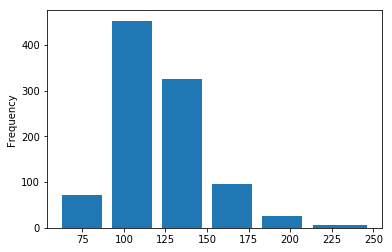

In [7]:
# Answer:
movies['duration'].plot(kind='hist',bins=[60,90,120,150,180,210,250],rwidth=0.8)


#### Use a box plot to display that same data.

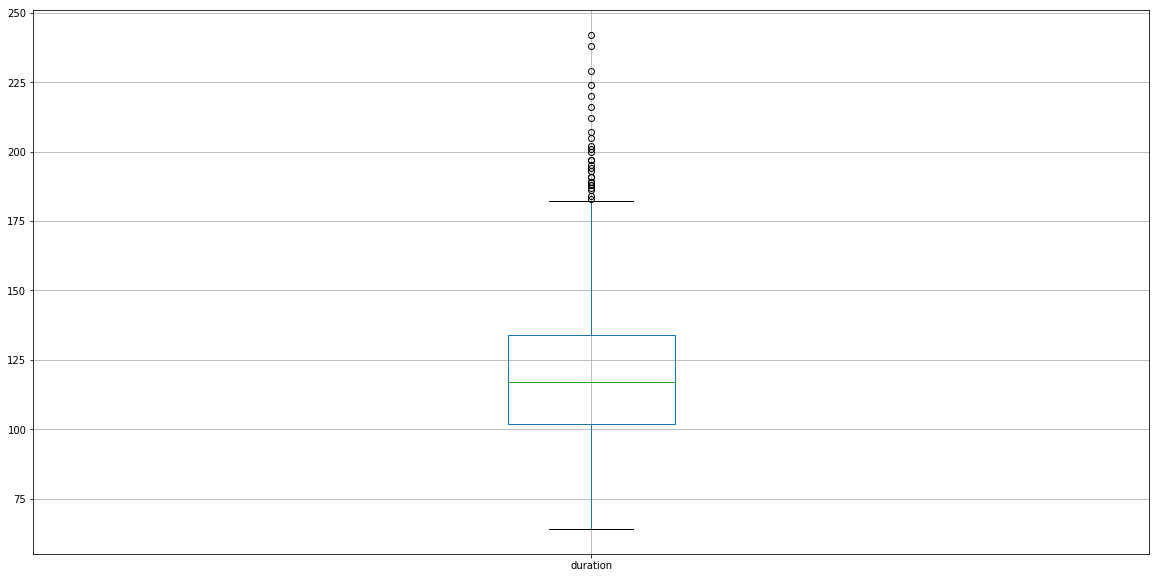

In [191]:
# Answer:
movies.boxplot(column="duration",figsize=(20,10))

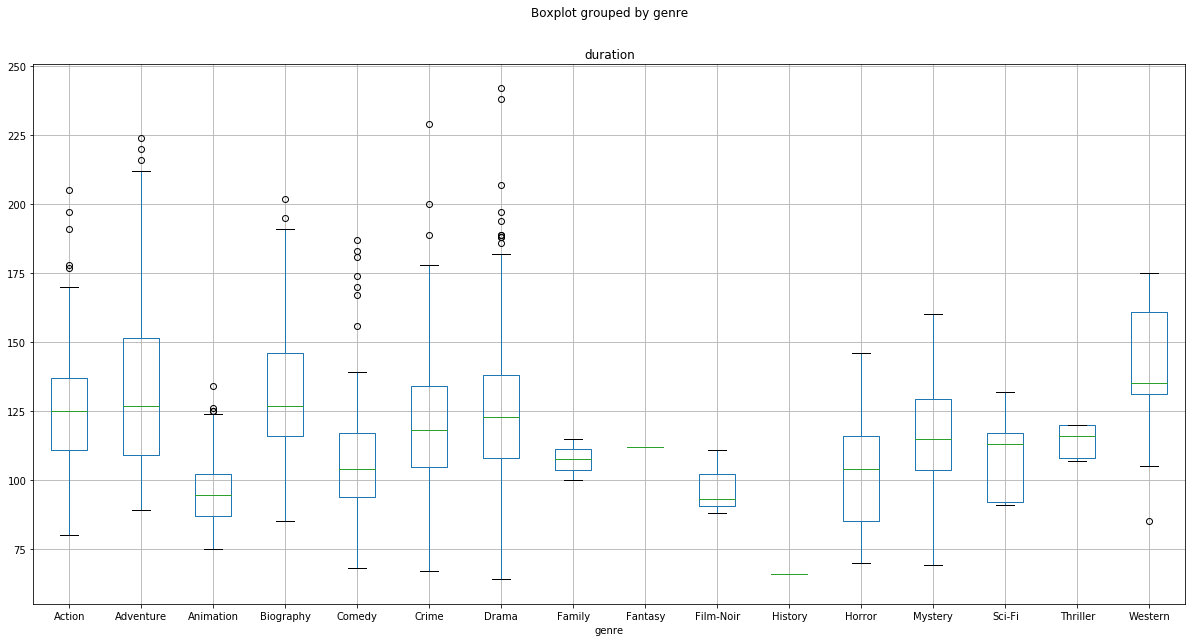

In [192]:
movies.boxplot(by="genre", column="duration",figsize=(20,10))

## Intermediate level

#### Count how many movies have each of the content ratings.

In [9]:
# Answer:
movies.loc[:,'content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0, 0.5, 'Number of Movies with Rating')

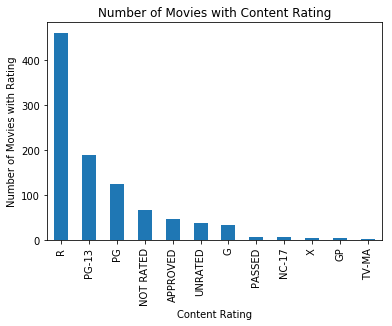

In [10]:
# Answer:
axes = movies.loc[:,'content_rating'].value_counts().plot(kind='bar')
axes.set_title('Number of Movies with Content Rating')
axes.set_xlabel("Content Rating")
axes.set_ylabel('Number of Movies with Rating')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [11]:
# Answer:

movies = movies.replace({'content_rating':{'NOT RATED':'UNRATED','APPROVED':'UNRATED','PASSED':'UNRATED','GP':'UNRATED'}})
movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [12]:
# Answer:
movies = movies.replace({'content_rating':{'X':'NC-17','TV-MA':'NC-17'}})
movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


#### Count the number of missing values in each column.

In [193]:
# Answer:
movies.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
actor_array       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [199]:
movies.loc[movies.content_rating.isna(),]

,star_rating,title,content_rating,genre,duration,actors_list,actor_array
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin...","[Paul Newman, Robert Redford, Katharine Ross]"
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ...","[Richard Burton, Clint Eastwood, Mary Ure]"
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']","[John Wayne, Kim Darby, Glen Campbell]"


In [201]:
movies = movies.replace({"content_rating":None},"PG")
movies.isna().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
actor_array       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [15]:
# Answer:
movies.loc[movies.loc[:,'duration'] >= 120 ,'star_rating'].mean()

7.948898678414082

In [73]:
movies.loc[movies.loc[:,'duration'] < 120 ,'star_rating'].mean()

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

In [180]:
# Answer: 
movies.corr()

,star_rating,duration
star_rating,1.000000,0.227149
duration,0.227149,1.000000


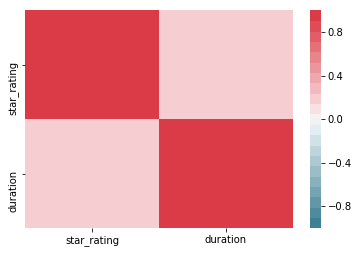

In [181]:
ax = sns.heatmap(movies.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21))

#### Calculate the average duration for each genre.

In [17]:
# Answer:

movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

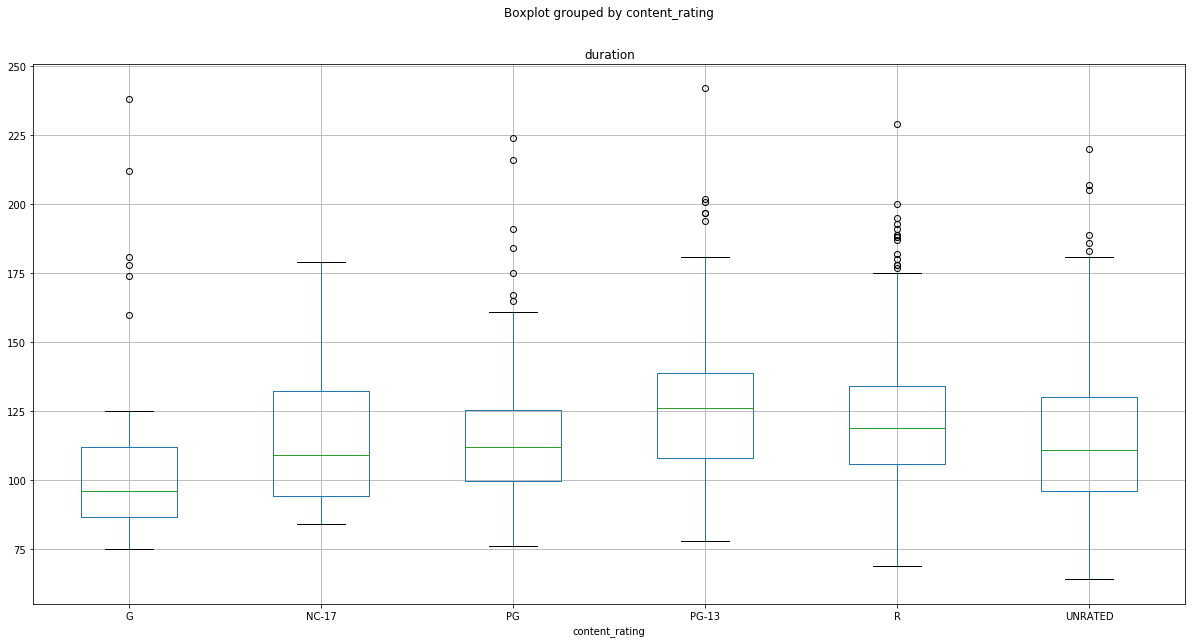

In [18]:
# Answer:
movies_rating_duration = movies.loc[:,['content_rating','duration']]
movies_rating_duration.boxplot(by="content_rating", column="duration",figsize=(20,10))

#### Find the title of the movie with the highest star rating in each genre

In [202]:
# Answer:
movies.groupby('genre')['star_rating','title'].max()

,star_rating,title
genre,,
Action,9.0,Yojimbo
Adventure,8.9,True Grit
Animation,8.6,Wreck-It Ralph
Biography,8.9,Walk the Line
Comedy,8.6,Zombieland
Crime,9.3,Zodiac
Drama,8.9,Zulu
Family,7.9,Willy Wonka & the Chocolate Factory
Fantasy,7.7,The City of Lost Children


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [20]:
# Answer:
dupe_movies_title = movies.duplicated(['title'])
movies.loc[dupe_movies_title,]

,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [21]:
#Compare movie durations
dupe_movies_title_duration = movies.duplicated(['title','duration'])
rows,columns= movies.loc[dupe_movies_title_duration,].shape
rows

0

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

#### Option 1: manually create a list of relevant genres, then filter using that list

In [22]:
# Answer:
grouped_movies = movies.groupby('genre')['star_rating'].count()
genres = grouped_movies.loc[grouped_movies.loc[:] > 10,].index.values
movies.loc[movies.loc[:,'genre'].isin(genres),].groupby('genre')['star_rating'].mean()



genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [23]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [24]:
# Answer:
overall_averages = movies.groupby('genre')['star_rating'].mean()
grouped_movies = movies.groupby('genre')['star_rating'].count()
overall_averages.loc[grouped_movies.loc[:] > 10]


    

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [25]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!

In [204]:
# What actors are in 10 movies or more
#First let's denormalize the table to split out actors from their array in the row
movies['actor_array'] = movies.apply(lambda row: eval(row['actors_list']),axis=1)
updated_movies = movies.drop(columns=['actors_list'])
denorm_movies_by_actor = updated_movies['actor_array'].apply(pd.Series).merge(updated_movies, left_index=True, right_index=True).drop(columns=['actor_array']).melt(id_vars = ['title', 'star_rating','content_rating','genre','duration'], value_name = 'actor').drop(columns='variable')
denorm_movies_by_actor

,title,star_rating,content_rating,genre,duration,actor
0,The Shawshank Redemption,9.3,R,Crime,142,Tim Robbins
1,The Godfather,9.2,R,Crime,175,Marlon Brando
2,The Godfather: Part II,9.1,R,Crime,200,Al Pacino
3,The Dark Knight,9.0,PG-13,Action,152,Christian Bale
4,Pulp Fiction,8.9,R,Crime,154,John Travolta
5,12 Angry Men,8.9,UNRATED,Drama,96,Henry Fonda
6,"The Good, the Bad and the Ugly",8.9,UNRATED,Western,161,Clint Eastwood
7,The Lord of the Rings: The Return of the King,8.9,PG-13,Adventure,201,Elijah Wood
8,Schindler's List,8.9,R,Biography,195,Liam Neeson
9,Fight Club,8.9,R,Drama,139,Brad Pitt


Text(0, 0.5, 'Number of Movies')

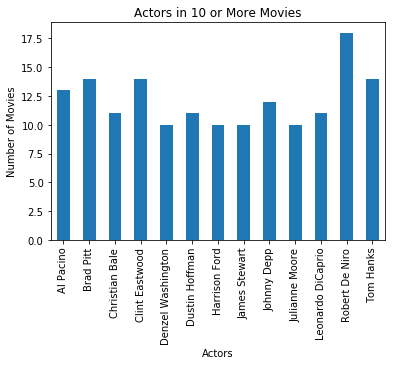

In [209]:
#Now count the number of movies actors have been in and choose the ones where count is more than 10
movie_count = denorm_movies_by_actor.groupby('actor')['title'].count()
axes = movie_count.loc[movie_count.loc[:] >= 10,].plot(kind='bar')
axes.set_title('Actors in 10 or More Movies')
axes.set_xlabel("Actors")
axes.set_ylabel('Number of Movies')

In [170]:
# What is the average movie rating for each actor that appears in 10 or more movies (Top Actors)?
top_actors = movie_count.loc[movie_count.loc[:] >= 10,].index.values
top_actor_movies = denorm_movies_by_actor.loc[denorm_movies_by_actor.loc[:,'actor'].isin(top_actors),]
top_actor_avg_star_rating = top_actor_movies.groupby('actor')['star_rating'].mean()
top_actor_avg_star_rating.sort_values(ascending=False)


actor
James Stewart        8.190000
Harrison Ford        8.140000
Al Pacino            8.107692
Leonardo DiCaprio    8.054545
Robert De Niro       8.044444
Christian Bale       8.027273
Tom Hanks            8.014286
Clint Eastwood       7.942857
Brad Pitt            7.921429
Dustin Hoffman       7.772727
Johnny Depp          7.733333
Denzel Washington    7.730000
Julianne Moore       7.720000
Name: star_rating, dtype: float64

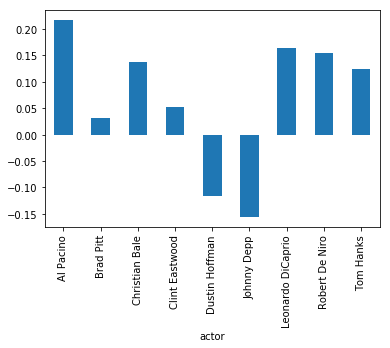

In [165]:
#Amongst the top actors, who's movies perform better than the overall average ?

#Get the overall average star_rating
avg_star_rating = movies['star_rating'].mean()

#Use the top actors
df_top_actor_avg_star_rating = top_actor_avg_star_rating.to_frame()
df_top_actor_avg_star_rating['rating_diff'] = df_top_actor_avg_star_rating.apply(lambda row: row['star_rating'] - avg_star_rating,axis=1)
df_top_actor_avg_star_rating.loc[:,'rating_diff'].plot(kind='bar')


             star_rating  duration
star_rating     1.000000  0.246547
duration        0.246547  1.000000


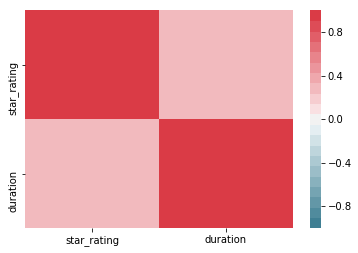

In [184]:
# Data is revealing that James "Jimmy" Stewart has the least amount of movies in the 
# top actors group but has the highest star rating
# and the highest difference from overall star rating average

mid_actors = movie_count.loc[(movie_count.loc[:] >= 2) ,].index.values
mid_actor_movies = denorm_movies_by_actor.loc[denorm_movies_by_actor.loc[:,'actor'].isin(mid_actors),]
mid_actors_agg = mid_actor_movies.groupby('actor')['star_rating','duration'].mean()
print(mid_actors_agg.corr())
ax = sns.heatmap(mid_actors_agg.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21))

#As we learned previously there is a slight correlation between average star rating and average duration
#Value below is calculated based on actors who have done 2 or more movies

Number of rows for Actors in 11 or more movies: 118

             star_rating  duration
star_rating     1.000000  0.839248
duration        0.839248  1.000000


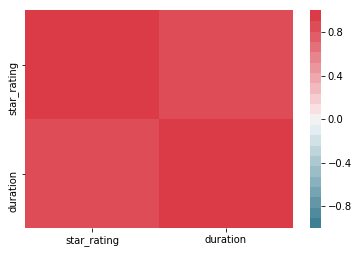

In [220]:
# This value however is stronger when actors have done 11 or more movies

mid_actors = movie_count.loc[(movie_count.loc[:] >= 11) ,].index.values
mid_actor_movies = denorm_movies_by_actor.loc[denorm_movies_by_actor.loc[:,'actor'].isin(mid_actors),]
mid_actors_agg = mid_actor_movies.groupby('actor')['star_rating','duration'].mean()
rows, columns = mid_actor_movies.shape
print("Number of rows for Actors in 11 or more movies: " + str(rows) +"\n")
print(mid_actors_agg.corr())
ax = sns.heatmap(mid_actors_agg.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21))

